#### Question B
Use a linear model with softmax activation to perform the classification.  Use a single layer of 100 neurons for your first attempt.

Use the hold-out cross validation.  Hold out the first 100 images from mnist.train.images.  You can get the hold out validation data using mnist.train.next_batch(100).

### Question B.1
[5] Clearly define the model and the cost function.  To train the network, use batch size of  100 for each epoch.

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
numPixels = 784
numClassifications = 10

# N x 784. Input size of x
x = tf.placeholder(tf.float32, [None, numPixels])

# N x 10. Input size of the correct data
ref = tf.placeholder(tf.float32, [None, numClassifications])

logits = tf.layers.dense(inputs=x, units=numClassifications, activation=tf.nn.relu, name="L1")

# # 784 x 10. Weight assigned for the probability that a pixel falls into a classification
# W = tf.Variable(tf.zeros([numPixels, numClassifications]))

# # Scalar 10. Classification bias added after the summation
# b = tf.Variable(tf.zeros([numClassifications]))

# # (N x 784) * (784 x 10) + 10 -> N * 10. Estimate on how likely the image is one of the classification 
# logits = tf.matmul(x, W) + b

# Calculate the cross entropy, doing the softmax function internally
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=ref)

# Take the average of the cross entropy values
cost = tf.reduce_mean(cross_entropy)

# (N). Take the highest percentile value in the prediction as the answer
prediction = tf.argmax(tf.nn.softmax(logits), axis=1)

labels = []
for label in mnist.test.labels:
    labels.append(np.argmax(label))
labels = np.array(labels)

rate = 0.1
epochs = 1000

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
s = tf.Session()
s.run(tf.global_variables_initializer())

errList = []
validationErrList = []
epochList = []
inputData, correctAns = mnist.train.next_batch(100)
validationInput, validationCorrect = mnist.train.next_batch(100)

for i in range(epochs):
    # Do the training
    err, _ = s.run((cost, optimizer), feed_dict={x: inputData, ref: correctAns})
    
    # Do the validation
    validationErr = s.run((cost), feed_dict={x: validationInput, ref: validationCorrect})
    validationErrList.append(validationErr)
            
    errList.append(err)
    epochList.append(i)

print("DONE")

DONE


### Question B.2
[5] Plot the training error over the epochs.

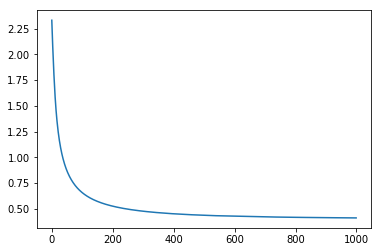

In [3]:
plt.plot(epochList, errList);
plt.show()

### Question B.3
[5] Plot the cross-validation error over the epochs. Is there overfitting?  Explain.

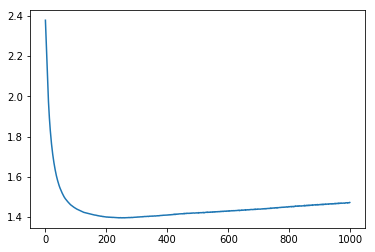

In [4]:
plt.plot(epochList, validationErrList);
plt.show()

There is overfitting which can be seen at around epoch 50 (from the graph). When the error starts increasing in the above plot, it can be seen that there is overfitting happening. Meaning that the training algorithm is too specific to the training data and should stop training on that data.

### Question B.4
[5] Evaluate and report the test error of the best trained linear model with 100 neurons.  The test data is to be taken from mnist.test.images.

In [5]:
# Check the test error
predic = s.run((prediction), feed_dict={x: mnist.test.images})
answers = np.equal(labels, predic)
corrGuesses = np.sum(answers)
testErr = corrGuesses / len(answers)   
print("The test error for the final iteration of the training is: " + str((1 - testErr) * 100) + " percent.")

The test error for the final iteration of the training is: 39.35 percent.
